<a href="https://colab.research.google.com/github/anna-klales/Python_S1b2020/blob/master/Curve_fitting_with_kittens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The scary looking code below

The code below might look a little scary, but it's mostly just a lot of comments.  Don't worry about it.  Just run the cell - it won't print out anything, but it will define some functions that we'll use below.  We'll talk a little more about what these functions do later.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



def chisquare(data,model,uncertainty):
    '''
    Calculates value of chi squared for model given data and unvertainty
    
    Parameters
    ----------
    data : numpy array
            1D vector of data values
                
    model : numpy array
            1D vector of values predicted by model
    
    uncertainty : numpy array
            1D vector of uncertainty corresponding to data
    
    Returns
    -------
    x2 : float
       Returns value of chi squared for this model given data and uncertainty
    '''

    x2 = np.sum((data-model)**2/uncertainty**2)
    
    return x2

def line(x,m,b):
    return m*x + b

def mycurvefit(func,XX,YY,UNCERT,xlabel,ylabel):
    '''
    Fits data (XX, YY, UNCERT) to function using scipy.curvefit, and then plots data and best fit
        Parameters
    ----------
    func : user-defined function
            Model to be used to fit data
                
    XX : numpy array
            1D vector of data's independent variable
    
    YY : numpy array 
            1D vector of data's dependent variable
            
    UNCERT : numpy array
            1D vector of uncertainty in YY
            
    xlabel: string
            label for plot's x-axis
            
    ylabel : string
            label for plot's y-axis
    
    Returns
    -------
    fitparams : numpy array
           1D array of best fit values of parameters
       
    fiterrs : numpy array
            1D array of errors on best fit parameters (taken from sqrt of diag of covariance matrix)
    
    fig : figure handle
    
    ax : axes handle
    
    '''
    
    ##################################################
    #                Do the curve fit                #
    ##################################################     
    
    
    # To get curve_fit to use UNCERT, set absolute_sigma = True.  Otherwise sigma = 1
    fitparams,pcov = curve_fit(func,XX,YY,sigma = UNCERT,absolute_sigma=True)

    # Find error in each parameter.  Assumes covariance matrix is roughly diagonal.
    fiterrs = np.sqrt(np.diag(pcov))

    # print out the parameters and errors on them 
    print('Best Fit Parameters:\n')
    i = 0
    for A,sigA in zip(fitparams, fiterrs):
        i = i + 1
        mystring = '\t P' + str(i) + ' = '
        print(mystring,round(A,2),'+/-',round(sigA,2))
        
    
    
    ##################################################
    #                Begin Plotting                  #
    ##################################################
    
    fig,ax = plt.subplots()
    # plot the raw data
    ax.errorbar(XX,YY,UNCERT,fmt='.',label='data')
    
    
    # plot the fit
    XX_shade = np.linspace(min(XX),max(XX),100)
    ax.plot(XX_shade,func(XX_shade,*fitparams),label = 'best fit')
    
    # make the plot nice
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.legend()
    
    
    
    ##################################################
    #    Calculate and display the fit metrics       #
    ##################################################
    
    # calculate the number of degrees of freedom
    shape = np.shape(XX)
    dof = shape[0] - len(fitparams)
    
    print('\n Fit Metrics:\n')
    print('\t Degrees of freedom: ', dof)
    
    X2 = chisquare(YY,func(XX,*fitparams),UNCERT)
    X2string = '\t Chi Squared = ' + str(round(X2,1))
    X2redstring = '\t Reduced Chi Squared = '+ str(round(X2/dof,1))
    print(X2string)
    print(X2redstring)

    
    return fitparams,fiterrs,fig,ax

# The data


In [30]:
#number of kittens in Anna's lap
nkittens = np.array([1,2,3,4,5])

# how happy Anna is, in happiness units
happiness = np.array([6.7,8.3,10.2,12.4,13.8])

# uncertainty in the means of Anna's happiness
happy_uncert = np.array([0.3,0.2,0.1,0.3,0.2])


#Plot the data:

You can customize your plot in many ways; [here are some basics](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html).



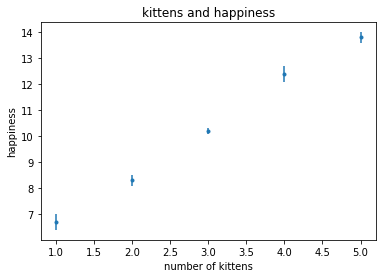

In [31]:
fig, ax = plt.subplots()
ax.errorbar(nkittens,happiness,yerr=happy_uncert,fmt='.')
ax.set_xlabel('number of kittens')
ax.set_ylabel('happiness')
ax.set_title('kittens and happiness');